In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
from pathlib import Path
import matplotlib.lines as mlines
from pathlib import Path



In [94]:
%matplotlib inline

In [85]:
df = pd.read_csv(r"C:\Users\thelo\OneDrive\Documentos\School\Data_Visualization\Netflix_Dataset.csv")

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   ratingDescription  1000 non-null   int64  
 4   release year       1000 non-null   int64  
 5   user rating score  605 non-null    float64
 6   user rating size   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


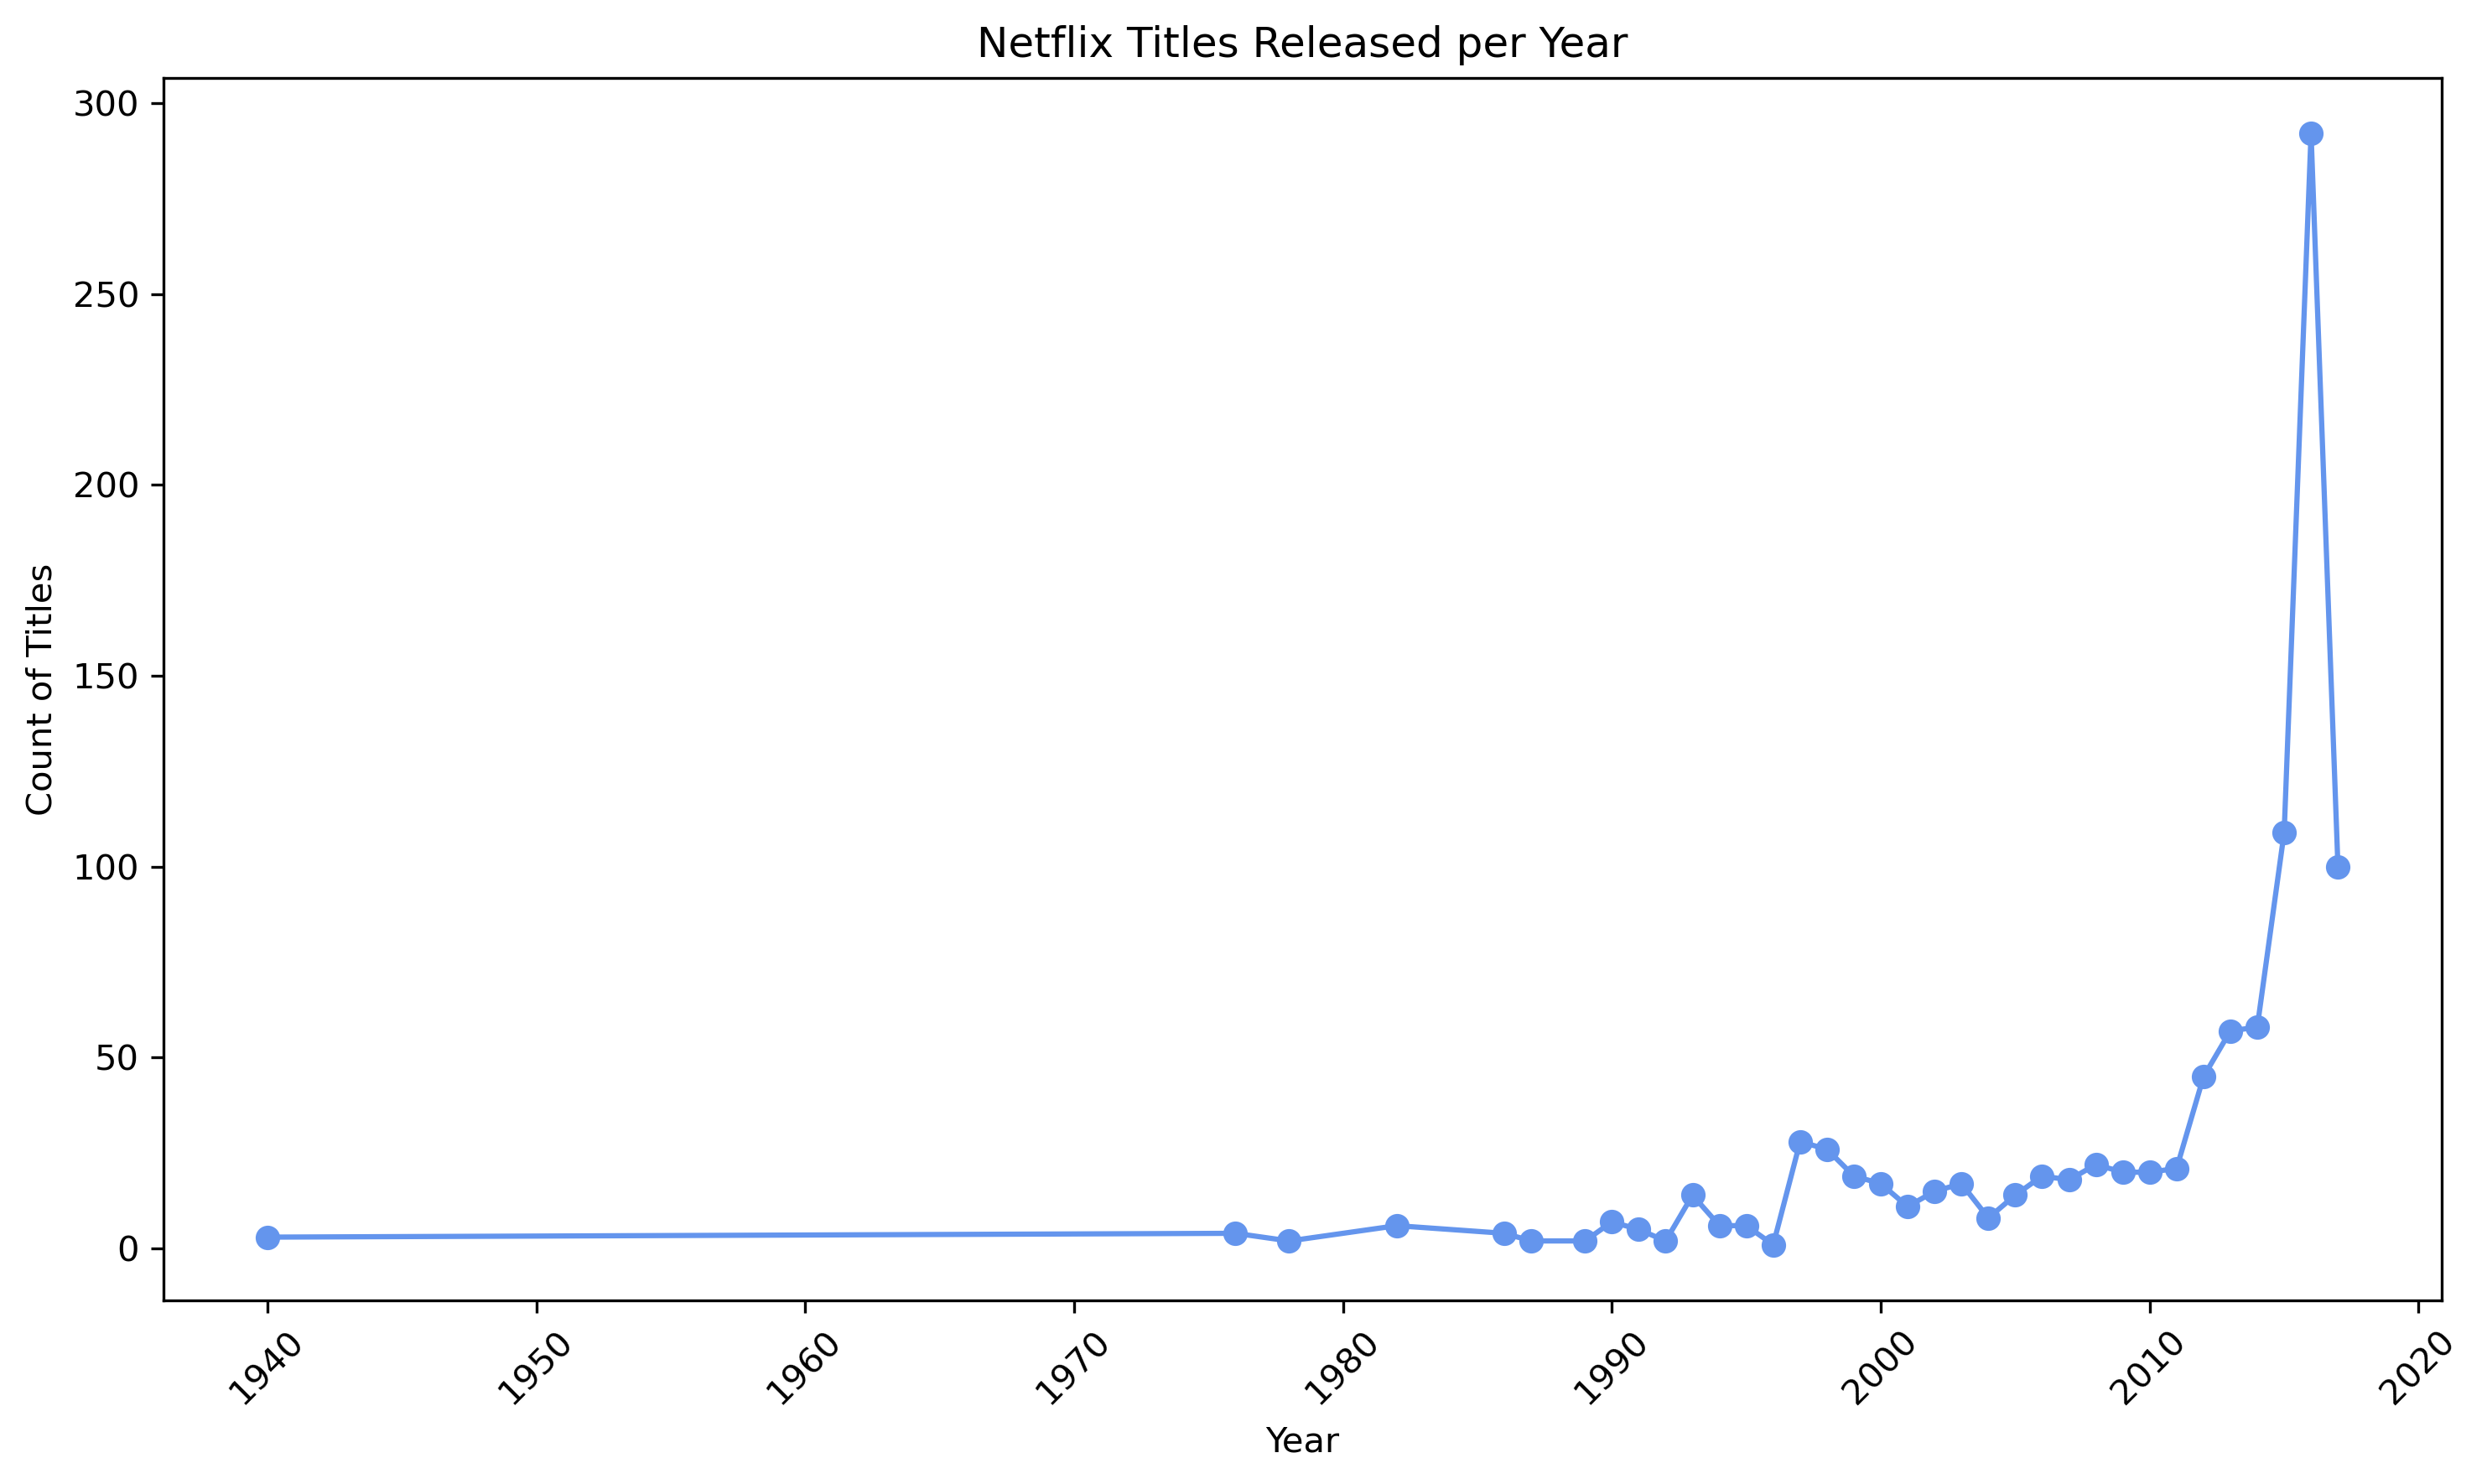

In [100]:
year_col = "release year" if "release year" in df.columns else "release_year"
years = pd.to_numeric(df[year_col], errors="coerce").dropna().astype(int)
per_year = years.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(per_year.index, per_year.values, marker="o")
plt.title("Netflix Titles Released per Year")
plt.xlabel("Year")
plt.ylabel("Count of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

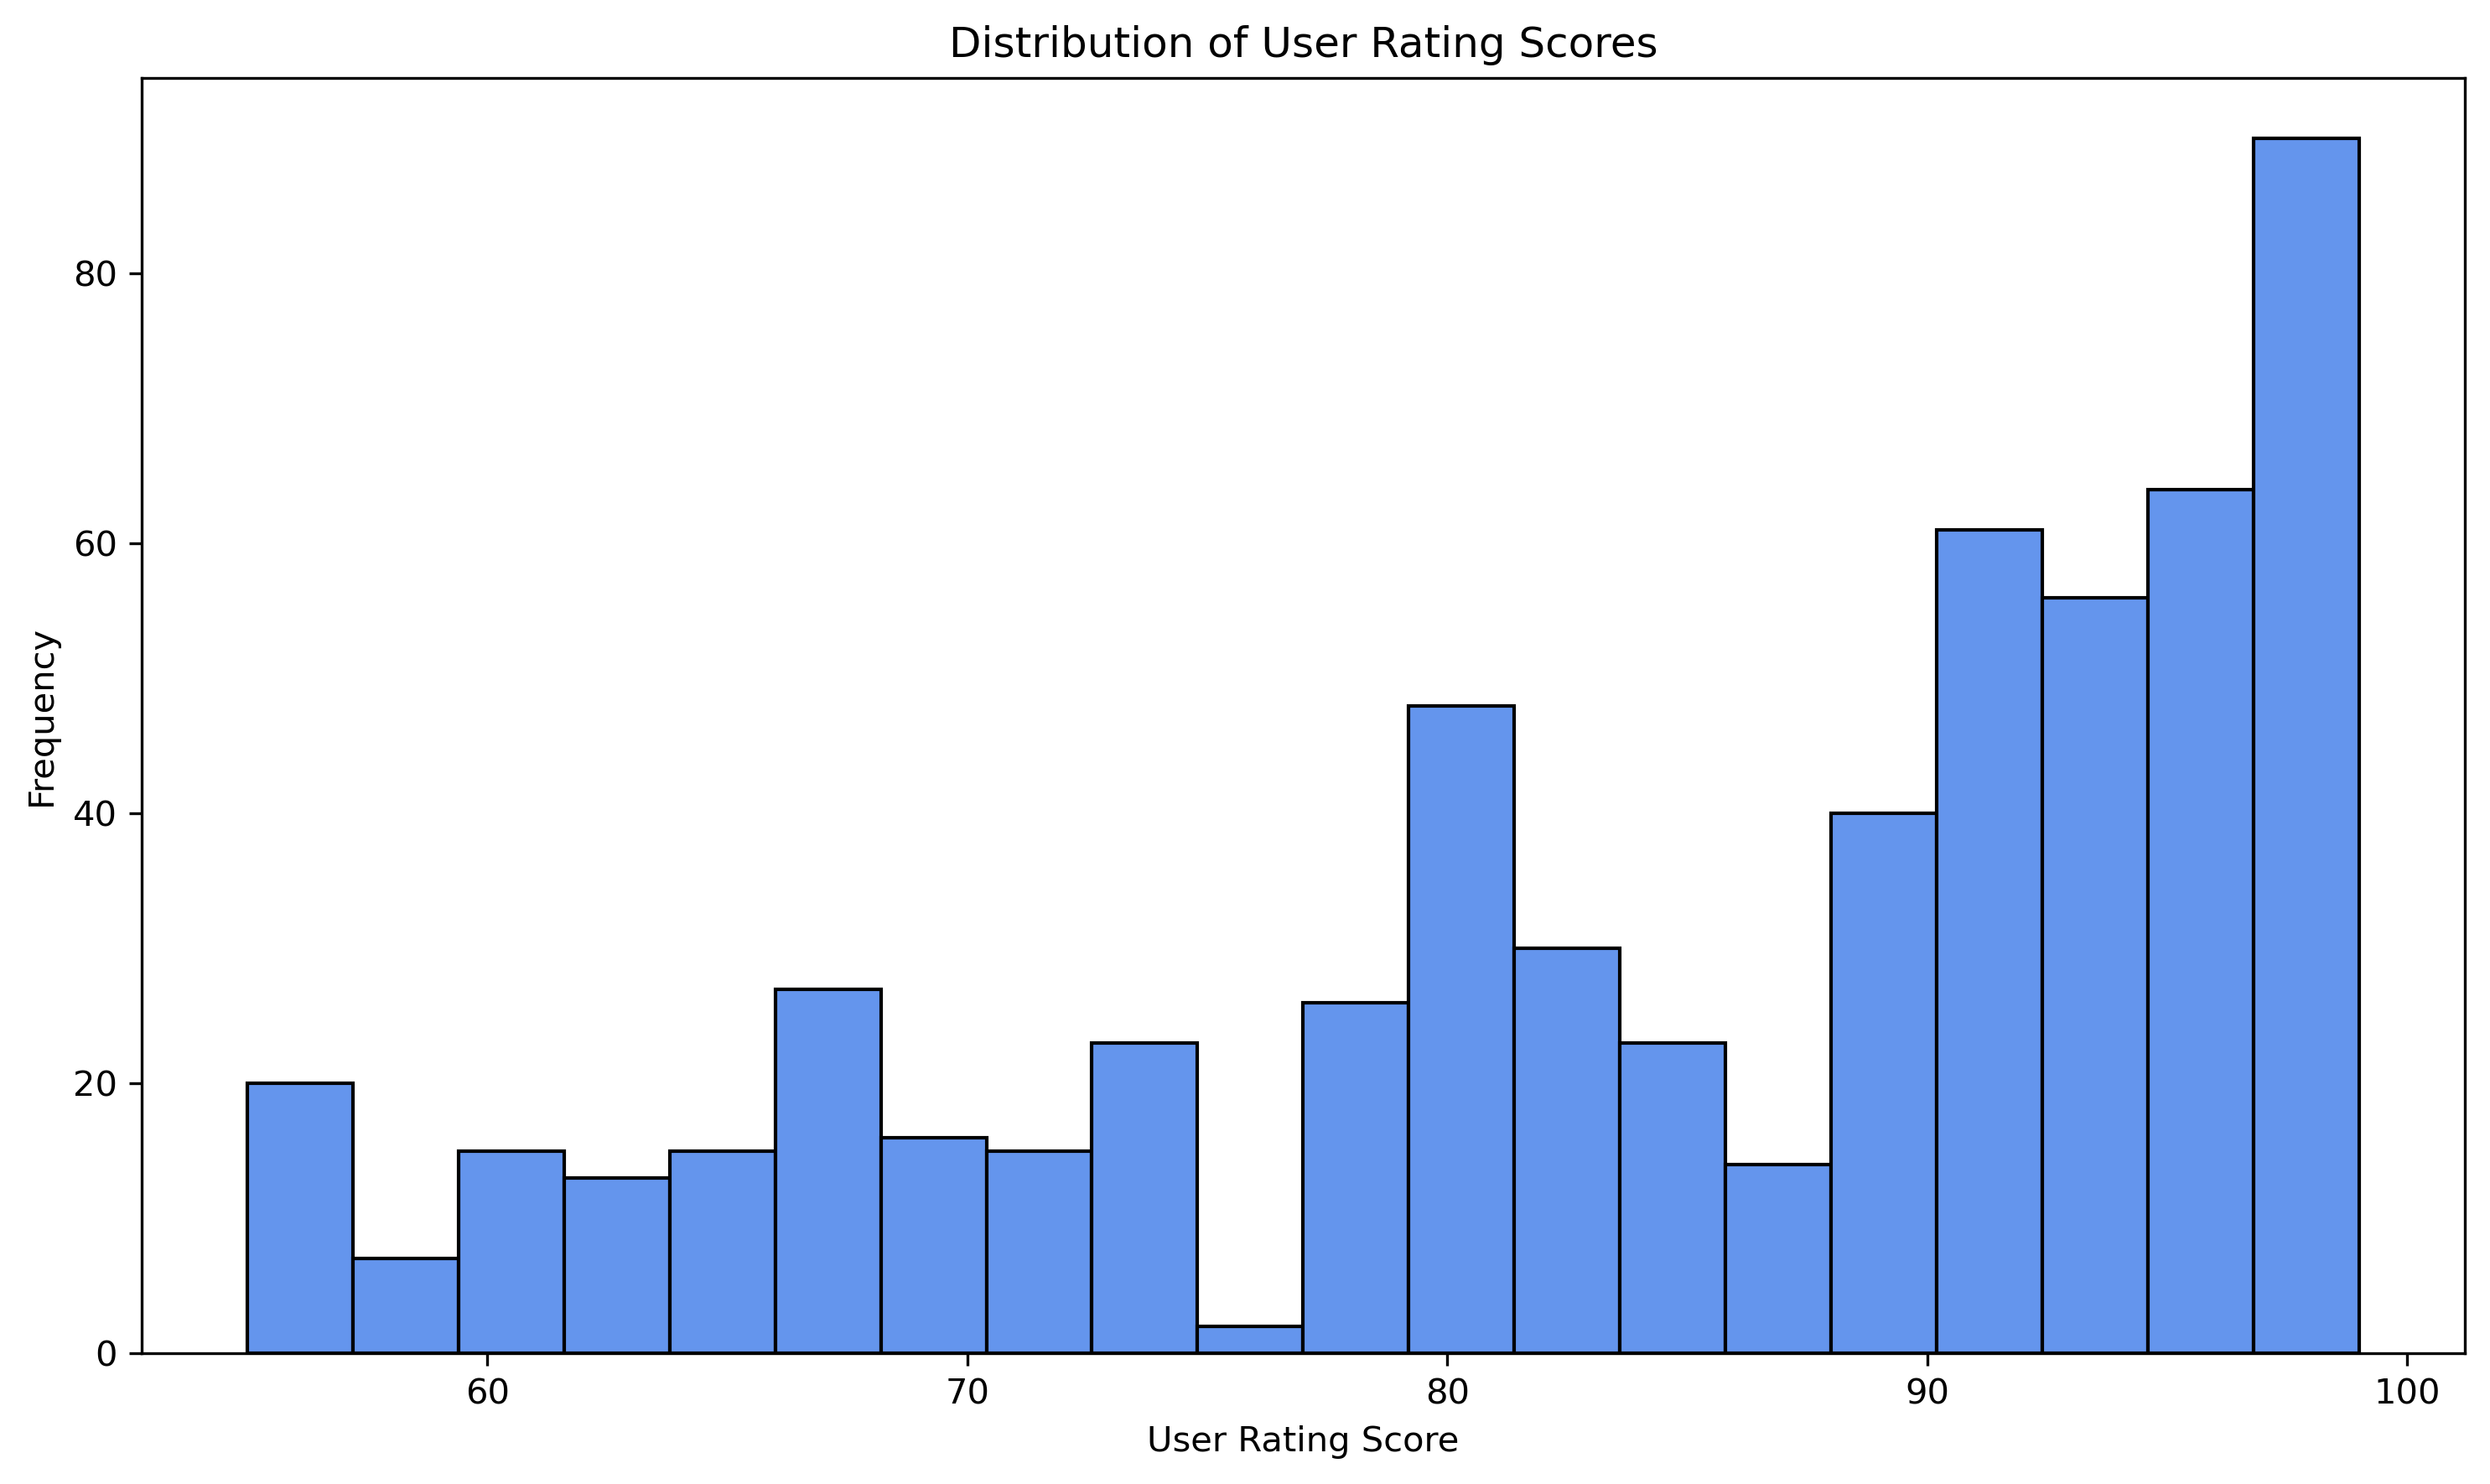

In [101]:
score_col = "user rating score" if "user rating score" in df.columns else "user_rating_score"
scores = pd.to_numeric(df[score_col], errors="coerce").dropna()

plt.figure(figsize=(10, 6))
plt.hist(scores, bins=20, edgecolor="black")
plt.title("Distribution of User Rating Scores")
plt.xlabel("User Rating Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

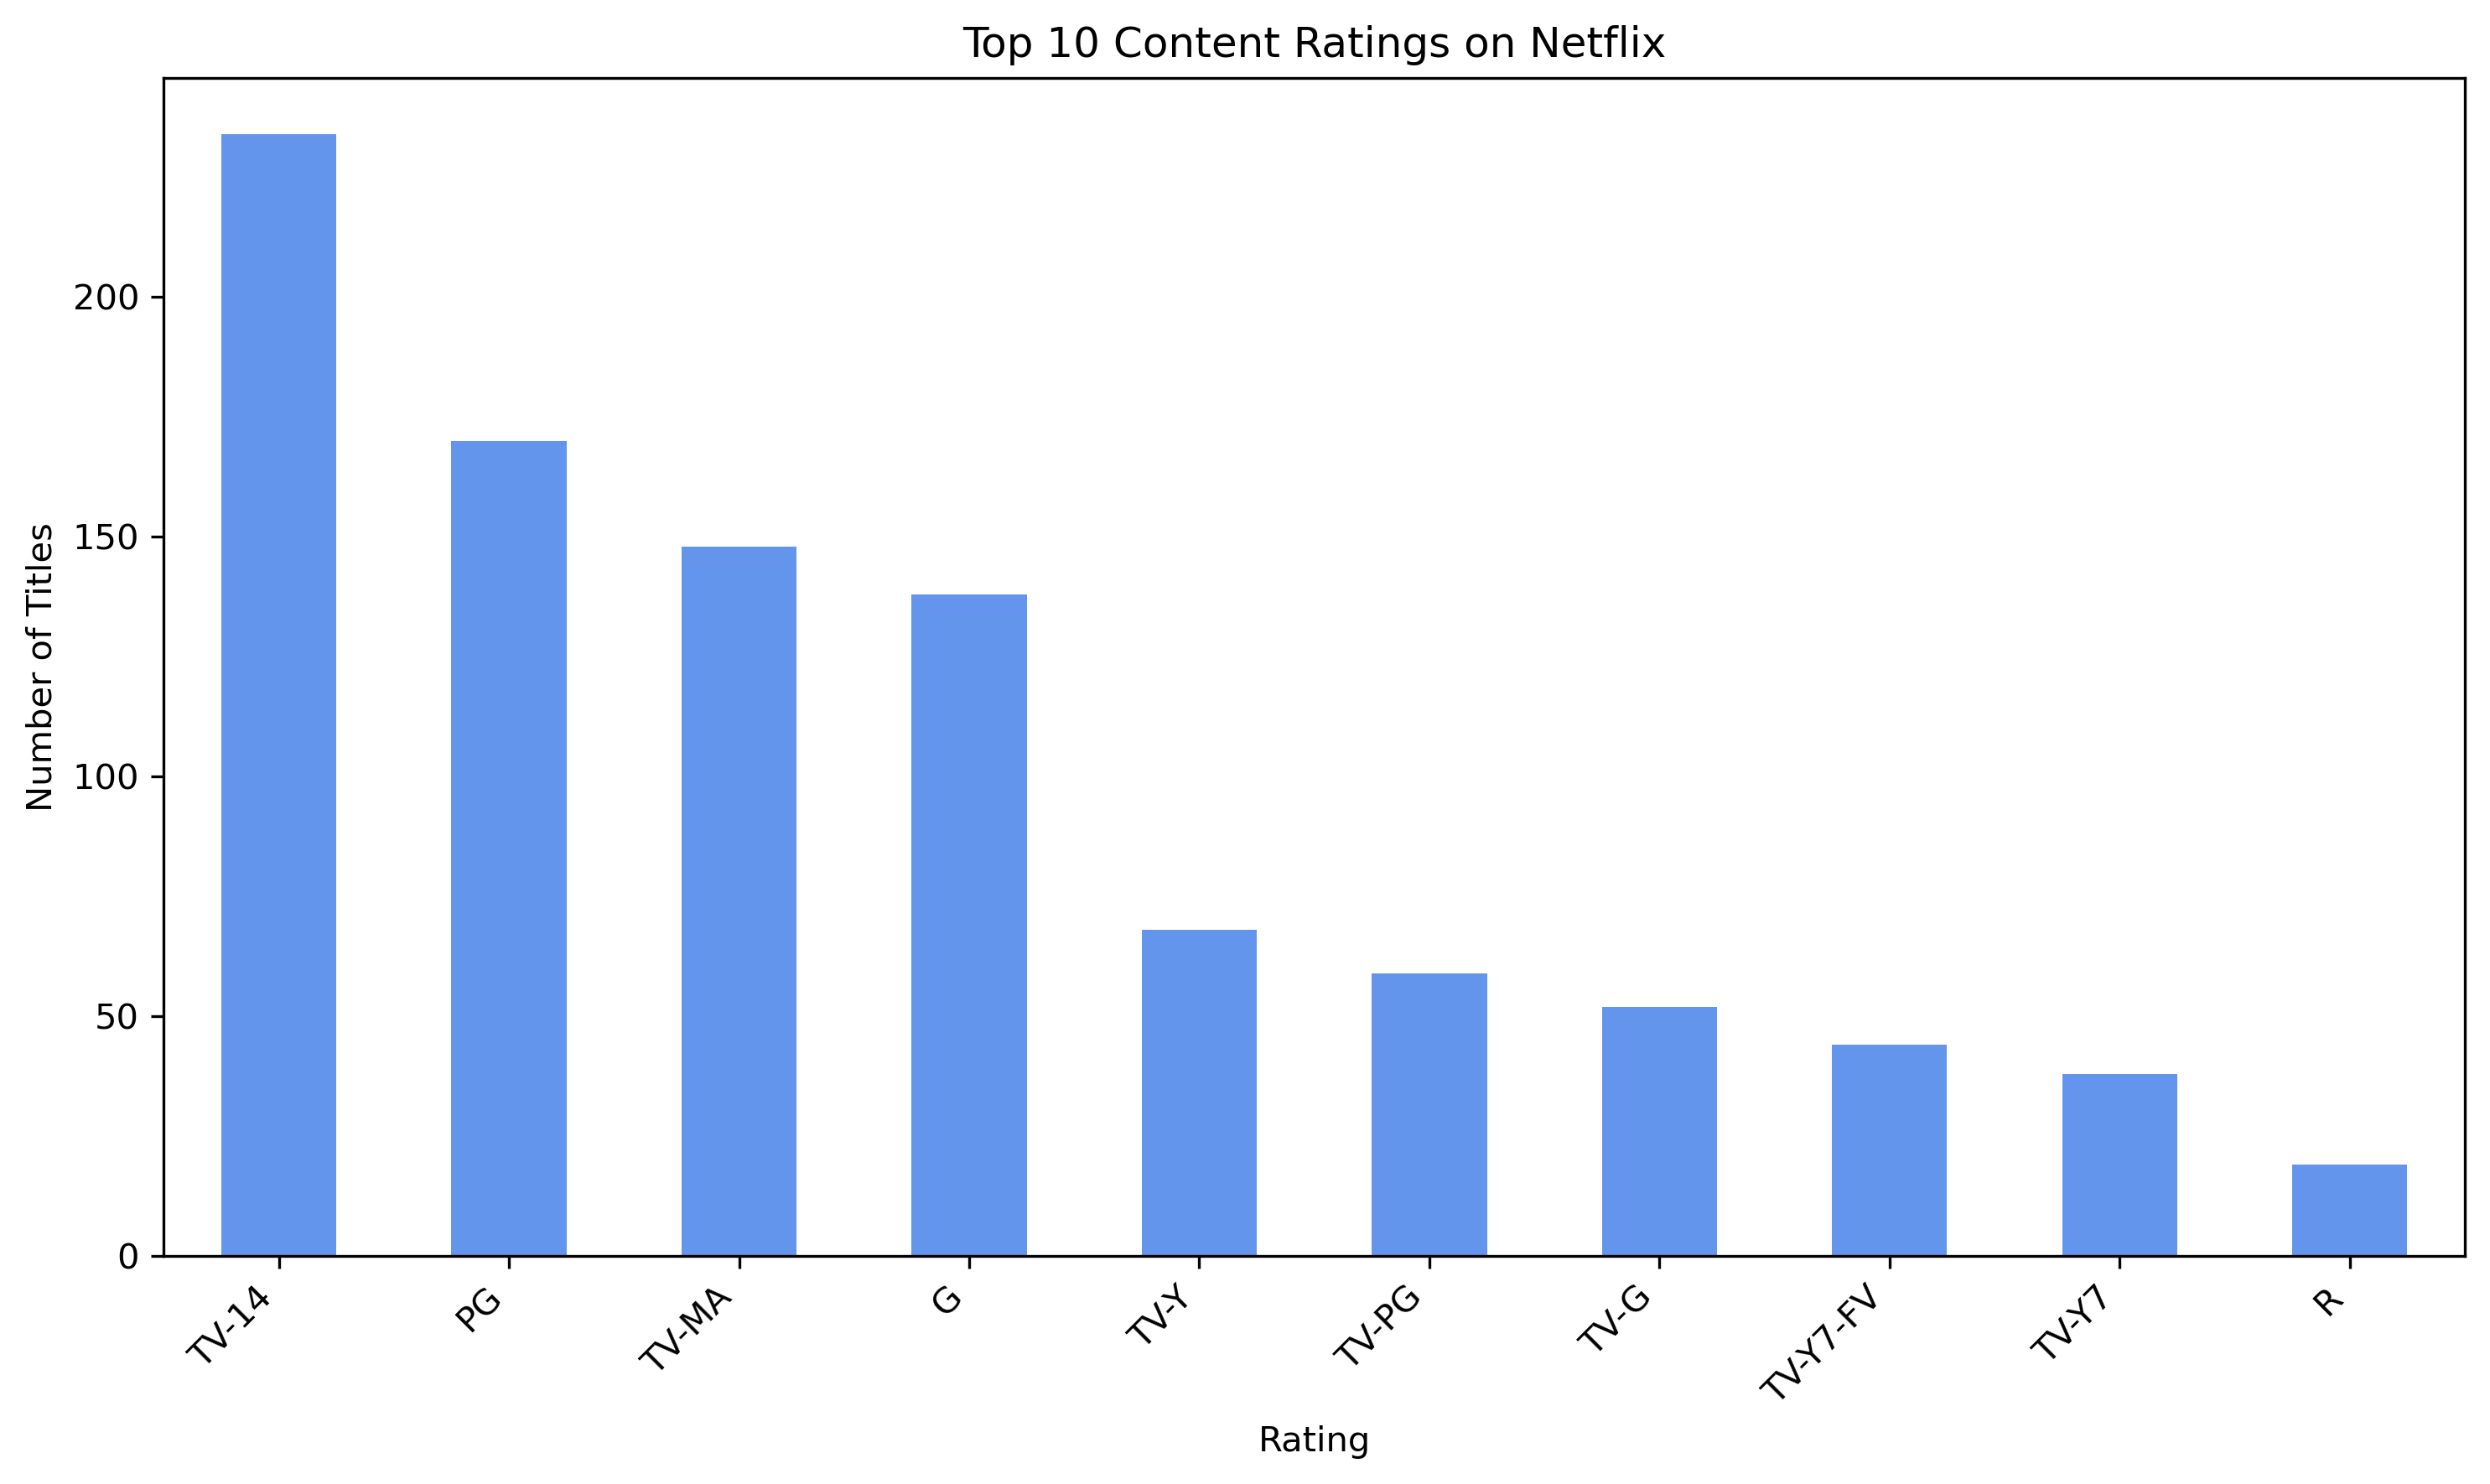

In [102]:
plt.figure(figsize=(10, 6))
(df["rating"].astype(str).str.strip().value_counts().head(10)
   .plot(kind="bar"))
plt.title("Top 10 Content Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("rating_counts_bar.png", dpi=200)
plt.show()

In [104]:
ratings = df["rating"].astype(str).str.strip()
score_col = "user rating score" if "user rating score" in df.columns else "user_rating_score"
scores = pd.to_numeric(df[score_col], errors="coerce")

In [ ]:
counts = ratings.value_counts()
top_n = 6
top_cats = counts.head(top_n).index.tolist()

fig, (ax0, ax1) = plt.subplots(
    1, 2, figsize=(14, 6), width_ratios=[1, 1.2]
)

In [ ]:
counts_top = counts.loc[top_cats][::-1]  
ax0.barh(counts_top.index, counts_top.values)
ax0.set_title("Most Common Content Ratings")
ax0.set_xlabel("Number of Titles")
ax0.grid(axis="x", alpha=0.3)

In [ ]:
for i, v in enumerate(counts_top.values):
    ax0.text(v, i, f" {int(v)}", va="center")

C:\Users\thelo\AppData\Local\Temp\ipykernel_24792\3338216155.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(


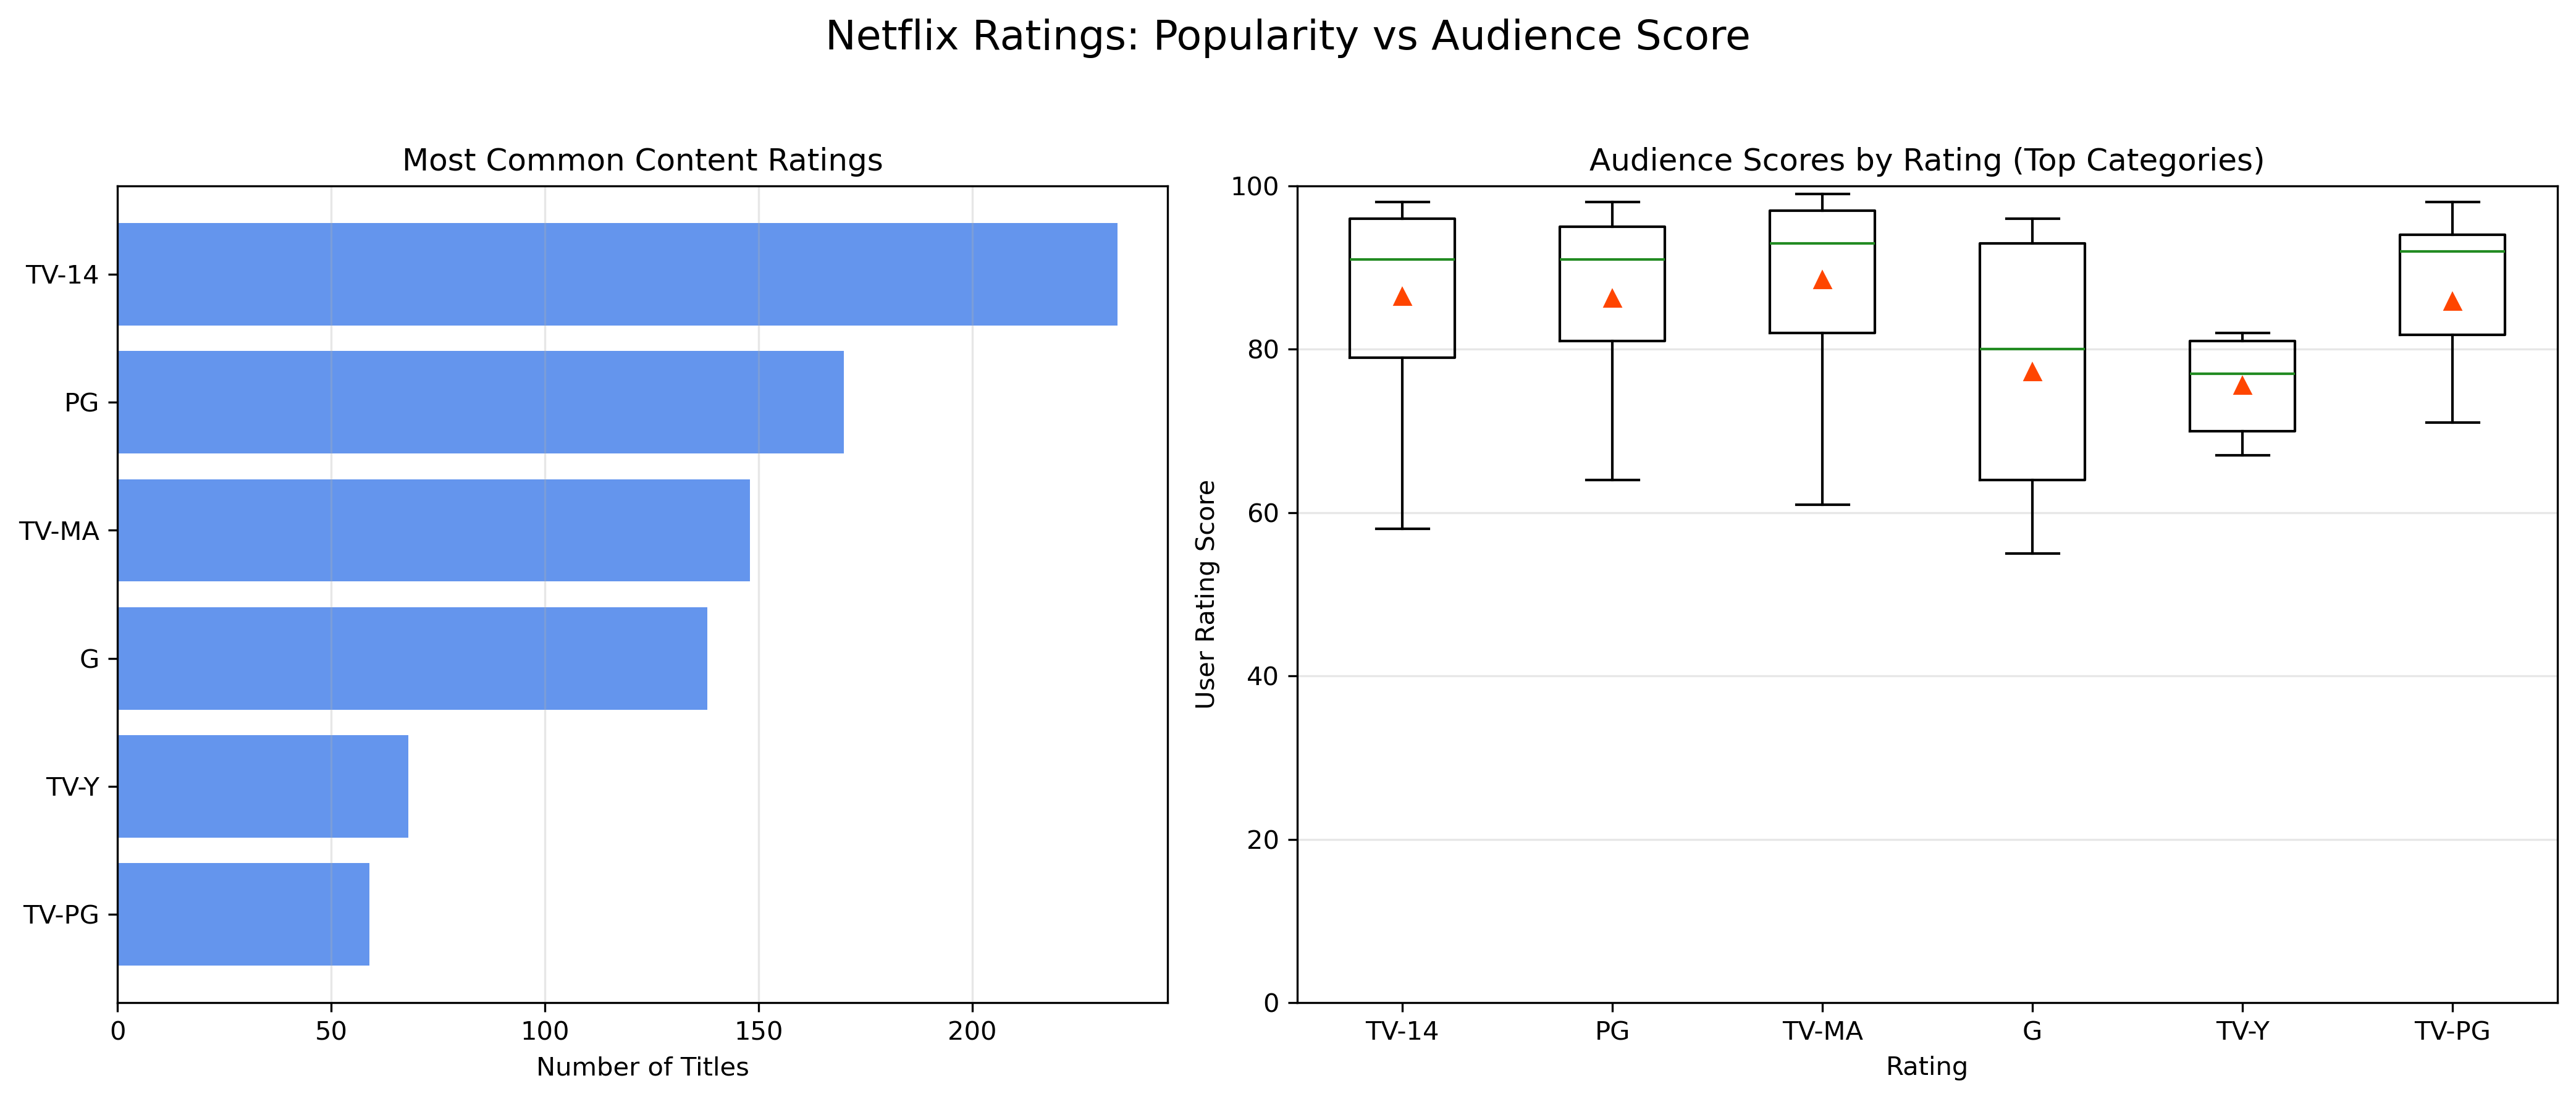

In [ ]:
box_data = [scores[ratings == cat].dropna() for cat in top_cats]

bp = ax1.boxplot(
    box_data,
    labels=top_cats,
    vert=True,
    showmeans=True,   
    meanline=False,
    showfliers=False   
)
ax1.set_title("Audience Scores by Rating (Top Categories)")
ax1.set_xlabel("Rating")
ax1.set_ylabel("User Rating Score")
ax1.set_ylim(0, 100)   
ax1.grid(axis="y", alpha=0.3)


fig.suptitle("Netflix Ratings: Popularity vs Audience Score", fontsize=16)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

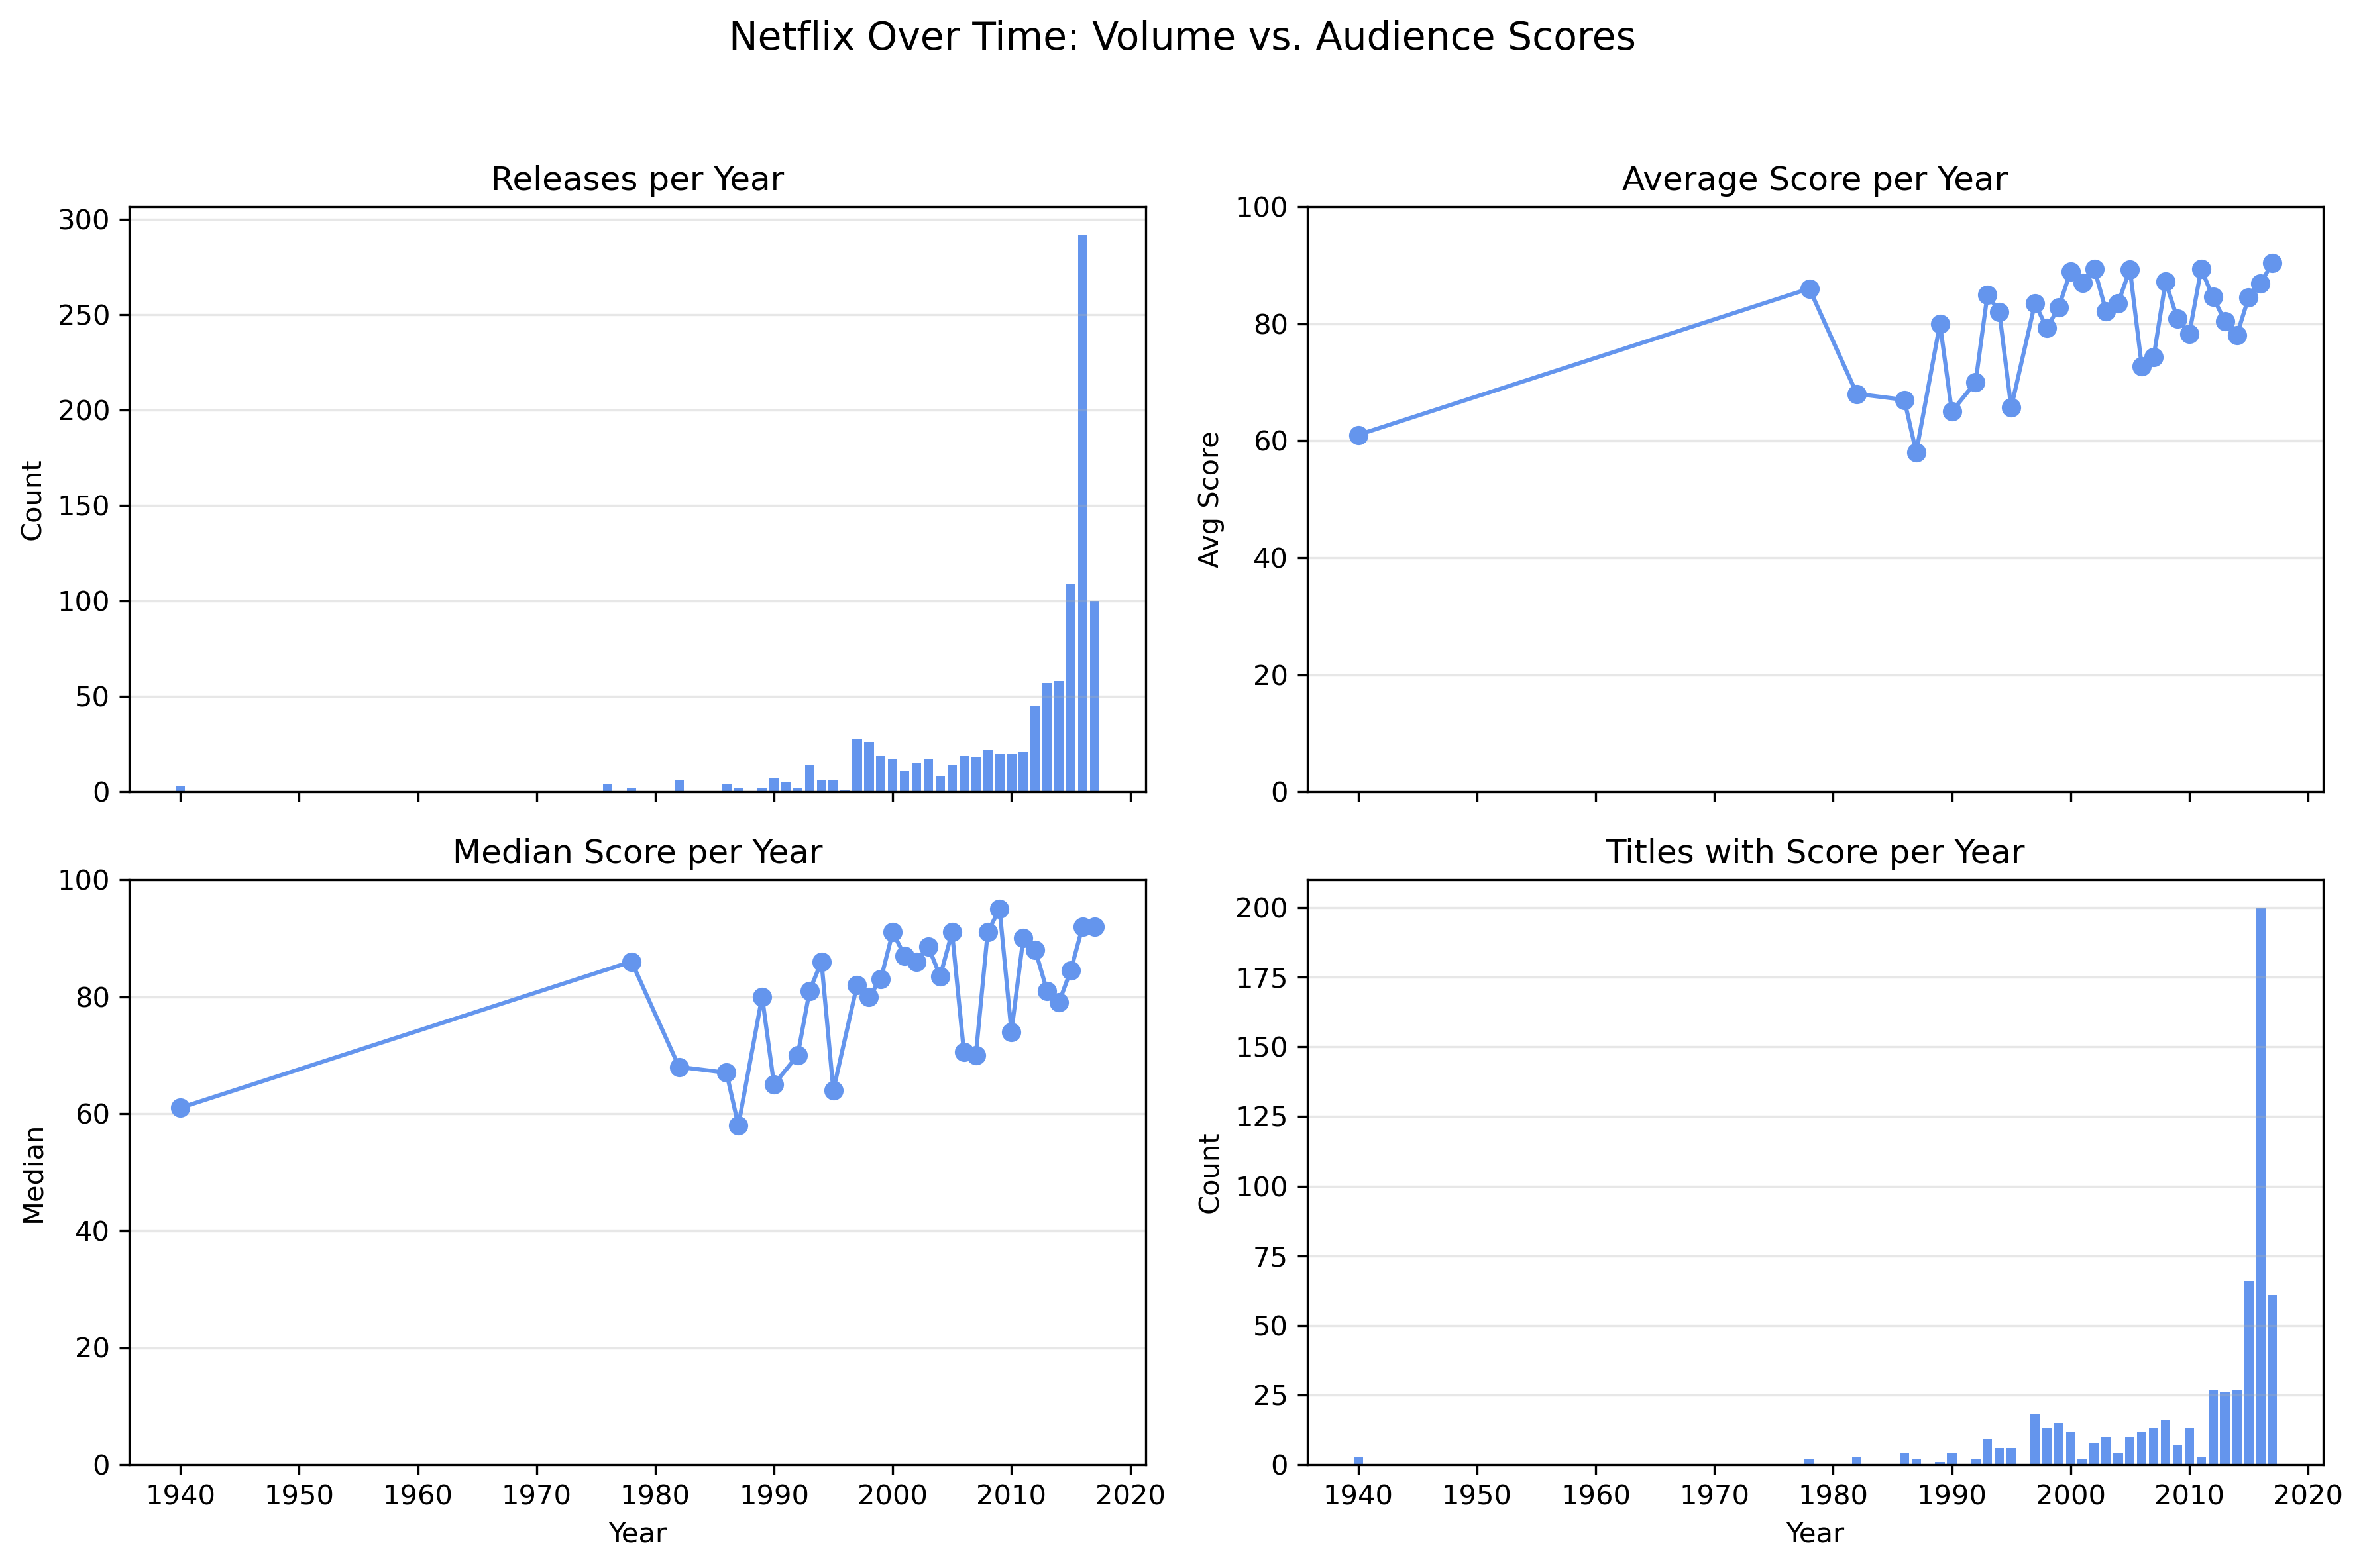

In [ ]:

year_col = "release year" if "release year" in df.columns else "release_year"
score_col = "user rating score" if "user rating score" in df.columns else "user_rating_score"

years = pd.to_numeric(df[year_col], errors="coerce").dropna().astype(int)
scores = pd.to_numeric(df[score_col], errors="coerce")
tmp = pd.DataFrame({"year": years, "score": scores})

per_year = years.value_counts().sort_index()
avg_score_by_year = tmp.dropna().groupby("year")["score"].mean().sort_index()
median_score_by_year = tmp.dropna().groupby("year")["score"].median().sort_index()
count_with_score = tmp.dropna(subset=["score"])["year"].value_counts().sort_index()

fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

ax00.bar(per_year.index, per_year.values)
ax00.set_title("Releases per Year"); ax00.set_ylabel("Count")

ax01.plot(avg_score_by_year.index, avg_score_by_year.values, marker="o")
ax01.set_title("Average Score per Year"); ax01.set_ylabel("Avg Score"); ax01.set_ylim(0, 100)

ax10.plot(median_score_by_year.index, median_score_by_year.values, marker="o")
ax10.set_title("Median Score per Year"); ax10.set_ylabel("Median"); ax10.set_ylim(0, 100)

ax11.bar(count_with_score.index, count_with_score.values)
ax11.set_title("Titles with Score per Year"); ax11.set_ylabel("Count")
for ax in (ax10, ax11): ax.set_xlabel("Year")
for ax in (ax00, ax01, ax10, ax11): ax.grid(axis="y", alpha=0.3)
fig.suptitle("Netflix Over Time: Volume vs. Audience Scores", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()